# Plotting for Exploratory Data Analysis (EDA)

# Haberman DataSet

## 1. DataSet Overview

* Dataset Location - [https://www.kaggle.com/gilsousa/habermans-survival-data-set/data]


* Dataset Description - The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Dataset Attributes - 
    
    A. Age of patient at time of operation (numerical)
    
    B. Patient's year of operation (year - 1900, numerical)
    
    C. Number of positive axillary nodes detected (numerical)
    
    D. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
    

* A,B,C are Inputs to get the class for D

* Objective: 
Classify the patient as 

    A. Survived(1) for 5 years or longer
    
    B. Died(2) within 5 years

  given the 3 features

* Domain Knowledge - 

     Positive axillary nodes - A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread.

In [110]:
# import the required Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [111]:
# Load Dataset into Pandas Dataframe after downloading from Kaggle. Dataset kept in the same folder as the Jupyter notebook.
Data_Cancer = pd.read_csv('haberman.csv',header = None)

# Column names are not defined, so setting header = None

In [112]:
# Check the number of data points and features
Data_Cancer.shape

# Dataset contains 306 rows and 4 columns

(306, 4)

In [113]:
# Setting column names as per Dataset Description
Data_Cancer.columns = ['Age', 'Treatment_Year', 'No_of_Positive_Lymph_Nodes', 'Survival_Status_After_5_Years']

In [114]:
# Checking he first few datapoints
Data_Cancer.head()



,Age,Treatment_Year,No_of_Positive_Lymph_Nodes,Survival_Status_After_5_Years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [115]:
# Mapping the Survival Status value 1 to 'Survived' and 2 to 'Died' for better readability
Data_Cancer['Survival_Status_After_5_Years'] = Data_Cancer['Survival_Status_After_5_Years'].map({1:'Survived',2:'Died'})
Data_Cancer.head()

,Age,Treatment_Year,No_of_Positive_Lymph_Nodes,Survival_Status_After_5_Years
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [116]:
# Getting an high level idea about the Dataset
Data_Cancer.describe()

,Age,Treatment_Year,No_of_Positive_Lymph_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [117]:
Data_Cancer['Survival_Status_After_5_Years'].value_counts()

Survived    225
Died         81
Name: Survival_Status_After_5_Years, dtype: int64

 ### Observations:
 
 1. As seen from below table, there are no null/na values in the dataset
 2. Max Age = 83 and Min Age = 30
 3. Max No of Lymph Nodes = 52 and Min No of Lymph Nodes = 0
 4. 225 Patients survived and 81 Patients died.The dataset is therefor an unbalanced Dataset.
 5. The dataset contains info from 1958 to 1969

## 2. Univariate Analysis

In [118]:
# Plotting PDF and CDF to identify features useful for classification
Data_Cancer_Survived = Data_Cancer[Data_Cancer['Survival_Status_After_5_Years'] == 'Survived']
Data_Cancer_Died = Data_Cancer[Data_Cancer['Survival_Status_After_5_Years'] == 'Died']

* Histogram and Probability Density Function

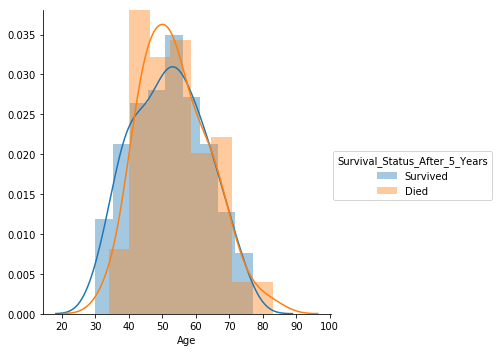

In [119]:
# On Age

sbn.FacetGrid(Data_Cancer, hue="Survival_Status_After_5_Years", size=5) \
   .map(sbn.distplot, "Age") \
   .add_legend();
plt.show();

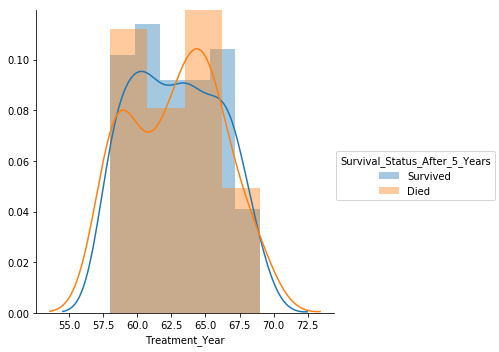

In [120]:
# on Treatment Year

sbn.FacetGrid(Data_Cancer, hue="Survival_Status_After_5_Years", size=5) \
   .map(sbn.distplot, "Treatment_Year") \
   .add_legend();
plt.show();

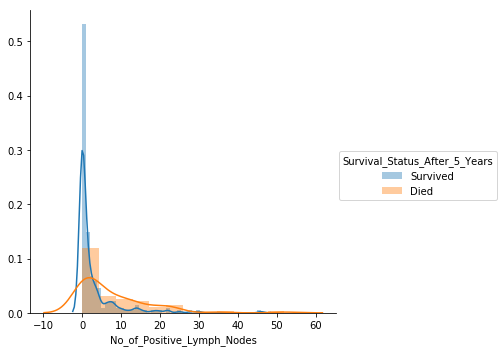

In [121]:
# on No of POsitive Lymph Nodes

sbn.FacetGrid(Data_Cancer, hue="Survival_Status_After_5_Years", size=5) \
   .map(sbn.distplot, "No_of_Positive_Lymph_Nodes") \
   .add_legend();
plt.show();

* Too much of overlap for Age and Treatment Year. Not much information can be gathered from the first two plots.
* No of Positive Lymphs Nodes plot however shows that, for patients having lymph nodes less than 3(approx), the survial rate is very high.
* Patients with Age less than 32(approx) have a slightly higher chance of survival

* Cumulative Distribution Function

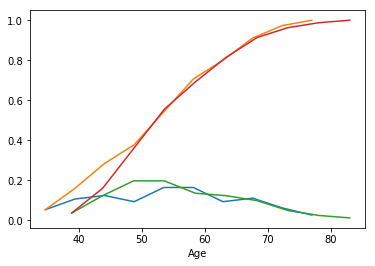

In [130]:
# Plots of CDF and PDF of Age for various Survival Status.

# Survived Status
counts, bin_edges = np.histogram(Data_Cancer_Survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



# Died Status
counts, bin_edges = np.histogram(Data_Cancer_Died['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')




plt.show()

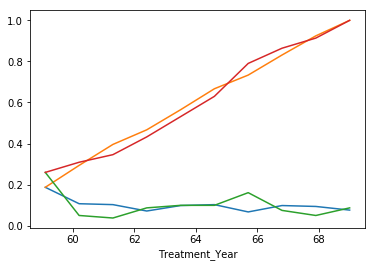

In [129]:
# Plots of CDF and PDF of TReatment_Year for various Survival Status.

# Survived Status
counts, bin_edges = np.histogram(Data_Cancer_Survived['Treatment_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




# Died Status
counts, bin_edges = np.histogram(Data_Cancer_Died['Treatment_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Treatment_Year')



plt.show()

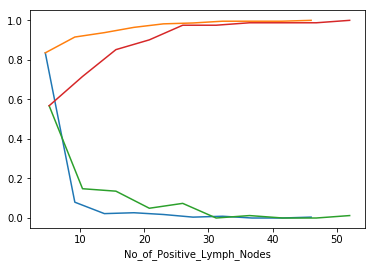

In [131]:
# Plots of CDF and PDF of No_of_Positive_Lymph_Nodes for various Survival Status.

# Survived Status
counts, bin_edges = np.histogram(Data_Cancer_Survived['No_of_Positive_Lymph_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



# Died Status
counts, bin_edges = np.histogram(Data_Cancer_Died['No_of_Positive_Lymph_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('No_of_Positive_Lymph_Nodes')



plt.show()

* Box Plot

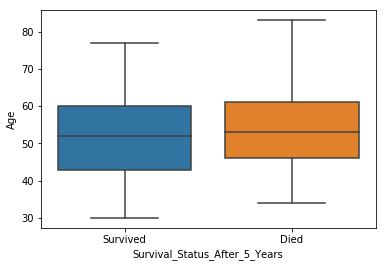

In [132]:
# Box Plot for Age

sbn.boxplot(x='Survival_Status_After_5_Years',y='Age', data=Data_Cancer)
plt.show()

Observations:
* More number of survivors between age 42 to 60
* More number of casualties between age 45 to 62


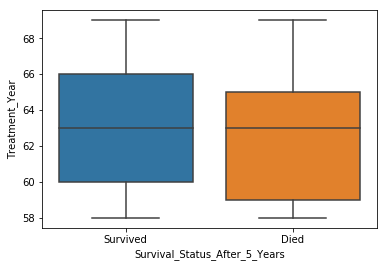

In [133]:
# Box Plot for Treatment_Year

sbn.boxplot(x='Survival_Status_After_5_Years',y='Treatment_Year', data=Data_Cancer)
plt.show()

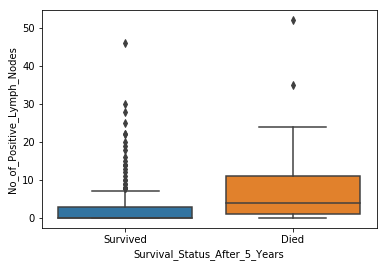

In [134]:
# Box Plot for No_of_Positive_Lymph_Nodes

sbn.boxplot(x='Survival_Status_After_5_Years',y='No_of_Positive_Lymph_Nodes', data=Data_Cancer)
plt.show()

Observations:
* Very high surival rate for No of Positive Lymph Nodes less than 3


* Violin Plots

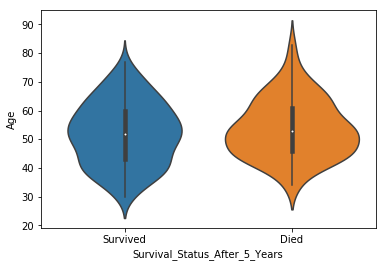

In [135]:
# Violin Plot for Age
sbn.violinplot(x="Survival_Status_After_5_Years", y="Age", data=Data_Cancer, size=8)
plt.show()

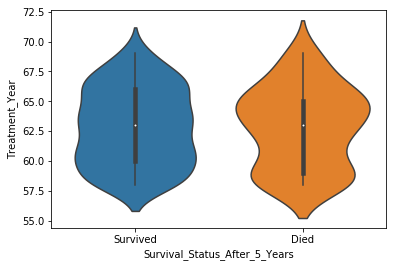

In [137]:
# Violin Plot for Treatment_Year
sbn.violinplot(x="Survival_Status_After_5_Years", y="Treatment_Year", data=Data_Cancer, size=8)
plt.show()

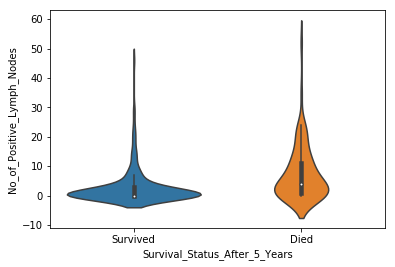

In [138]:
# Violin Plot for No_of_Posiive_Lymph_Nodes
sbn.violinplot(x="Survival_Status_After_5_Years", y="No_of_Positive_Lymph_Nodes", data=Data_Cancer, size=8)
plt.show()

Observations:
* Very high surival rate for No of Positive Lymph Nodes less than 3


## 3. Bivariate Analysis

* Pair Plot

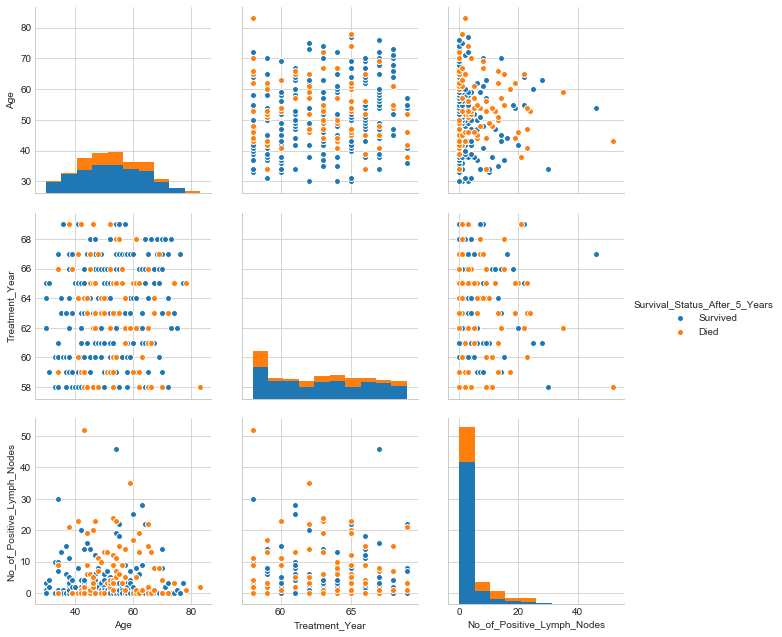

In [140]:
# pairwise scatter plot: Pair-Plot

sbn.set_style("whitegrid");
sbn.pairplot(Data_Cancer, hue="Survival_Status_After_5_Years", size=3);
plt.show()

Observations:
* For most cases of Age values, if the No of Positive Lymph Nodes is in the range 0-2, the survival rate is considerably high.
* Same cant be said for Treatment Year

* Scatter Plot

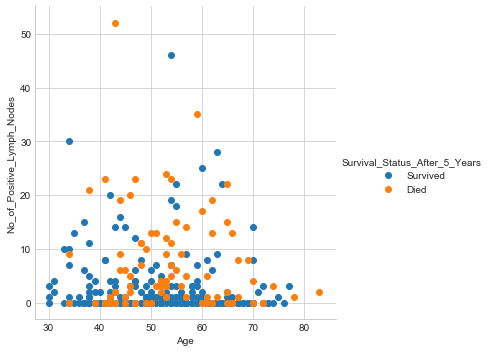

In [143]:
# Creating Scatter plots by plotting Age and Treatment Year to put emphasis on above observation
sbn.set_style("whitegrid");
sbn.FacetGrid(Data_Cancer, hue="Survival_Status_After_5_Years", size=5) \
   .map(plt.scatter, "Age", "No_of_Positive_Lymph_Nodes") \
   .add_legend();
plt.show();

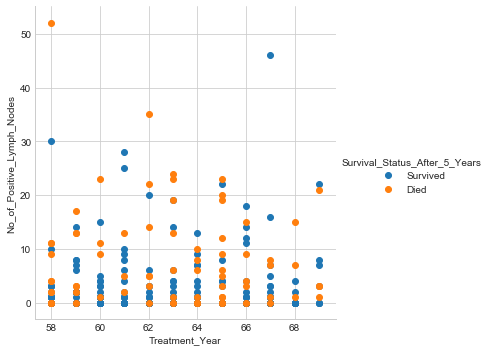

In [144]:
sbn.set_style("whitegrid");
sbn.FacetGrid(Data_Cancer, hue="Survival_Status_After_5_Years", size=5) \
   .map(plt.scatter, "Treatment_Year", "No_of_Positive_Lymph_Nodes") \
   .add_legend();
plt.show();

## Summarizing plots




#### After the Univariate and Bi-Variate analysis, it is seen that the variable "No_of_Positive_Lymph_Nodes" plays a very important role in determining the chances of Survival. If the patient has lower than 3 positive lymph nodes, his/her chances of survival are very very high.

#### Additionally, if the patient falls below the age of 32, there is a slightly higher chance of his/her survival.


